In [40]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Abrir el cuadro de diálogo para seleccionar múltiples archivos CSV
file_paths = filedialog.askopenfilenames(
    filetypes=[("CSV files", "*.csv")],
    title="Seleccionar archivos CSV"
)

# Mostrar las rutas de los archivos seleccionados
print("Archivos seleccionados:")
data_frames = []  # Lista para almacenar los DataFrames de cada archivo

for file_path in file_paths:
    print(file_path)
    # Leer solo las primeras 4 columnas y a partir de la cuarta fila del archivo CSV usando pandas
    df = pd.read_csv(file_path, usecols=range(4), skiprows=3)
    # Definir los encabezados de las columnas
    df.columns = ["Fecha", "SalveFacha(PAPLT801_ACH1_CT)", "Sucus(PAPLT813_ACH2_CT)", "Mogotes(PAPLT808_ACH1_CT)"]
    
    data_frames.append(df)  # Agregar el DataFrame a la lista

datos = pd.concat(data_frames, ignore_index=True)

datos['Fecha'] = pd.to_datetime(datos['Fecha'])
columnas_float = ['SalveFacha(PAPLT801_ACH1_CT)', 'Sucus(PAPLT813_ACH2_CT)', 'Mogotes(PAPLT808_ACH1_CT)']
datos[columnas_float] = datos[columnas_float].apply(pd.to_numeric, errors='coerce')

Archivos seleccionados:
C:/Users/juanj/OneDrive/Documentos/PruebasSpyder/NIVELES REPRESAS PAPALLACTA 2014.csv
C:/Users/juanj/OneDrive/Documentos/PruebasSpyder/NIVELES REPRESAS PAPALLACTA 2015.csv
C:/Users/juanj/OneDrive/Documentos/PruebasSpyder/NIVELES REPRESAS PAPALLACTA 2016_cor.csv
C:/Users/juanj/OneDrive/Documentos/PruebasSpyder/NIVELES REPRESAS PAPALLACTA 2017.csv
C:/Users/juanj/OneDrive/Documentos/PruebasSpyder/NIVELES REPRESAS PAPALLACTA 2018.csv


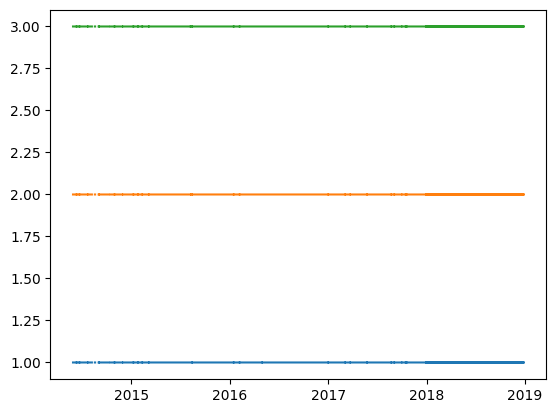

In [44]:
cols_to_check = datos.columns[1:]  # Ignora la primera columna

df_indicator = datos[cols_to_check].notnull().astype(int)
df_replaced = df_indicator.replace(0, np.nan)

plt.plot(datos.iloc[:, 0], df_replaced.iloc[:, 0])
plt.plot(datos.iloc[:, 0], 2*df_replaced.iloc[:, 1])
plt.plot(datos.iloc[:, 0], 3*df_replaced.iloc[:, 2])